In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="LIUS6iZxTLKRgUYpZivO")
project = rf.workspace("cv-dky4q").project("-n2ted")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [2]:
!nvidia-smi

Wed Jul  2 13:31:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P0             26W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
%pip install ultralytics==8.0.196
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6362.3/8062.4 GB disk)


In [4]:
import torch

# 先保存原始的 torch.load 函数
original_torch_load = torch.load

# 定义 monkey patch 函数，避免无限递归
def patched_torch_load(*args, **kwargs):
    if 'weights_only' not in kwargs:
        kwargs['weights_only'] = False
    return original_torch_load(*args, **kwargs)

# 替换 torch.load
torch.load = patched_torch_load


In [5]:
pip uninstall ray -y


Note: you may need to restart the kernel to use updated packages.


In [6]:
from ultralytics import YOLO

# ✅ 加载 YOLOv8x 模型（首次会自动下载）
model = YOLO("yolov8m.pt")

# ✅ 开始训练
model.train(
    data="/kaggle/working/漏保上端火地绝缘电阻-4/data.yaml",  # 替换为你的数据路径
    epochs=40,               # 训练轮数，适中
    imgsz=640,               # 输入图像大小（建议不变）
    batch=8,                # P100 16GB 显存建议最大 batch
    workers=4,               # Kaggle 最多可用 2~4 workers
    cache=True,              # 将图像缓存入内存，加速训练
    name="yolov8x_p100_run", # 训练记录保存的路径
    device=0,                # 默认使用 GPU 0
    optimizer="auto",        # 自动选择最优优化器
    verbose=False            # 减少控制台输出，加快运行
)


New https://pypi.org/project/ultralytics/8.3.161 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/working/漏保上端火地绝缘电阻-4/data.yaml, epochs=40, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=True, device=0, workers=4, project=None, name=yolov8x_p100_run, exist_ok=False, pretrained=True, optimizer=auto, verbose=False, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vi

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a1dc55f8c50>
fitness: 0.5748005574516056
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([     0.2751,     0.38598,     0.78681,     0.56771,     0.67163])
names: {0: 'black', 1: 'fire_ground_probe', 2: 'resistance_meter', 3: 'symbol_flash_or_panda', 4: 'watermark_time'}
plot: True
results_dict: {'metrics/precision(B)': 0.893506434698382, 'metrics/recall(B)': 0.8809614695340502, 'metrics/mAP50(B)': 0.9109615712242691, 'metrics/mAP50-95(B)': 0.5374493336990874, 'fitness': 0.5748005574516056}
save_dir: PosixPath('runs/detect/yolov8x_p100_run3')
speed: {'preprocess': 0.17579162822050207, 'inference': 12.111467473647174, 'loss': 0.0012061175178079045, 'postprocess': 2.011642736547133}

🎯 正在推理图像：SDSLYS2024-12-09000459_20241217080103231_25456_jpg.rf.375fb1256b02fde246f4f9a394642c61.jpg



image 1/1 /kaggle/working/漏保上端火地绝缘电阻-4/train/images/SDSLYS2024-12-09000459_20241217080103231_25456_jpg.rf.375fb1256b02fde246f4f9a394642c61.jpg: 640x640 1 black, 1 fire_ground_probe, 1 resistance_meter, 1 watermark_time, 16.1ms
Speed: 1.5ms preprocess, 16.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from current font.
Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from current font.
Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from current font.
Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from current font.


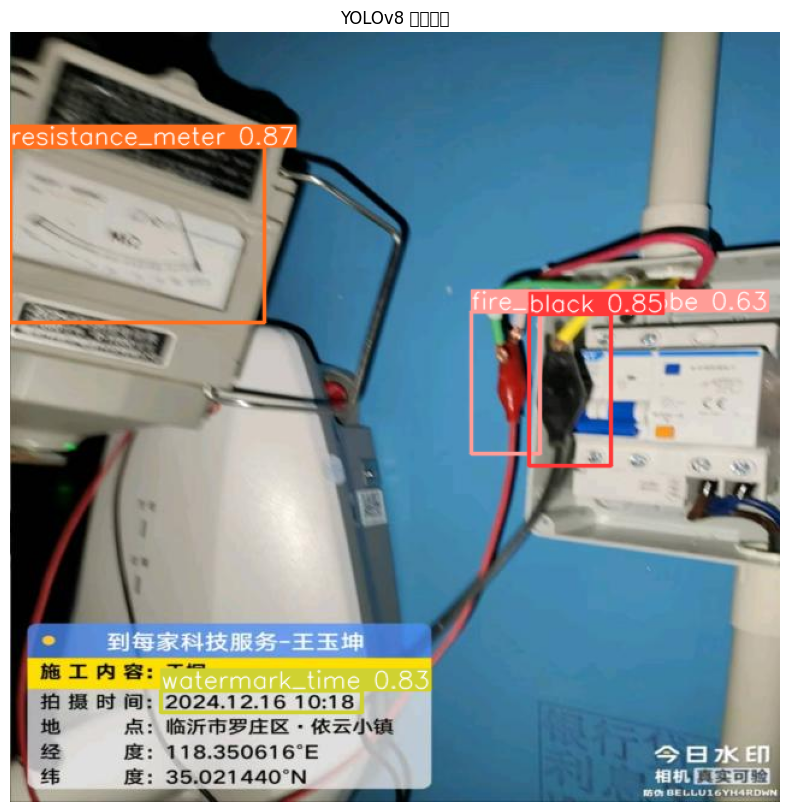

In [8]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# ✅ 配置
model_path = "/kaggle/working/runs/detect/yolov8x_p100_run3/weights/best.pt"  # 或 yolov8n.pt, yolov8x.pt 等
img_dir = "/kaggle/working/漏保上端火地绝缘电阻-4/train/images"  # 替换为你的图像目录

# ✅ 加载模型
model = YOLO(model_path)

# ✅ 随机选择一张图片进行预测并可视化
def test_random_image(img_dir):
    image_files = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if not image_files:
        print("❌ 图像目录为空！")
        return

    img_file = random.choice(image_files)
    img_path = os.path.join(img_dir, img_file)
    print(f"🎯 正在推理图像：{img_file}")

    results = model(img_path)  # 推理
    result_img = results[0].plot()  # 带检测框的图像（BGR）

    # 显示图像
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("YOLOv8 预测结果")
    plt.show()

# ▶️ 调用测试函数
test_random_image(img_dir)
